<a href="https://colab.research.google.com/github/abhilashhn1993/Sentiment_Analysis_of_Tweets/blob/master/LDATopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk; 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!pip install spacy
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 552kB 42.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=b75636dab0b6cccfe64a4b56ed2d40823afea86f1d096752b714b3ce8ecd7150
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=e5250e1cf22d54a57092db7c5f35ff0d43eaec66e46e83ca93b7ccefad6150f0
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [0]:
#Adding Extra Stopwords to be removed from the dataset
stop_words.extend(['http', 'https', 'twitter', 'www', 'instagram', 'zsgdbw', 'tmblr', 'co'])

In [143]:
len(stop_words)

206

In [0]:
stop_words.extend(['make','really','see','go','would','even','get','com','still','do','dont','know','actually','much', 'let','s','have','name','photo'])

In [8]:
from google.colab import files
uploaded = files.upload()

Saving tweets_PostDiagnosis.csv to tweets_PostDiagnosis.csv
Saving tweets_PreDiagnosis.csv to tweets_PreDiagnosis.csv


In [0]:
import io
df_post = pd.read_csv(io.BytesIO(uploaded['tweets_PostDiagnosis.csv']))
df_pre = pd.read_csv(io.BytesIO(uploaded['tweets_PreDiagnosis.csv']))

In [0]:
df_post_data = df_post
df_pre_data = df_pre

In [0]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 
lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    three = " ".join(lemmatize.lemmatize(i) for i in two.split())
    return three

In [14]:
pre_data = df_pre.applymap(cleaning)['Tweets']
text_list = [i.split() for i in pre_data]
len(text_list)

26083

In [15]:
pre_data.head()

0             damn read bucky lucky thought hell lucky
1                          good luck sends support ray
2    well im kpop stan stans stan stan little boy t...
3                             mega deleted folder year
4      wearing shoe cause lazy put kid tip tap tip tap
Name: Tweets, dtype: object

In [16]:
type(pre_data)

pandas.core.series.Series

In [0]:
# Convert to list
pre_data = df_pre.Tweets.values.tolist()

In [0]:
# Remove Emails
pre_data = [re.sub('\S*@\S*\s?', '', sent) for sent in pre_data]

In [0]:
# Remove new line characters
pre_data = [re.sub('\s+', ' ', sent) for sent in pre_data]

In [129]:
# Remove distracting single quotes
pre_data = [re.sub("\'", "", sent) for sent in pre_data]

pprint(pre_data[:1])

['damn I just read Bucky as lucky and thought WHO THE HELL IS LUCKY?!..']


In [0]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [131]:
pre_data_words = list(sent_to_words(pre_data))
print(pre_data_words[:1])

[['damn', 'just', 'read', 'bucky', 'as', 'lucky', 'and', 'thought', 'who', 'the', 'hell', 'is', 'lucky']]


In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [0]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [0]:
# Remove Stop Words
pre_data_words_nostops = remove_stopwords(pre_data_words)

In [135]:
print(pre_data_words_nostops)

[['damn', 'read', 'bucky', 'lucky', 'thought', 'hell', 'lucky'], ['good', 'luck', 'sends', 'support', 'rays'], ['well', 'im', 'kpop', 'stan', 'stans', 'stan', 'stan', 'little', 'boys', 'think', 'seb', 'old', 'problem', 'kpop', 'loli', 'concept', 'young', 'flower', 'concept', 'always', 'anything', 'real'], ['mega', 'deleted', 'folders', 'year'], ['isnt', 'wearing', 'shoes', 'cause', 'lazy', 'put', 'kid', 'tip', 'tap', 'tip', 'tap'], ['right', 'one'], ['watching', 'movie', 'sebastian', 'noticed', 'sebastian', 'playing', 'jeff', 'middle', 'movie', 'jhsjsjsjsj', 'started', 'watching', 'great', 'im', 'upset', 'like', 'give', 'oscar', 'everybody', 'good'], ['im', 'blocked'], ['looks', 'like', 'bigbangs', 'second', 'hand'], ['anybody', 'dm', 'picture', 'interesting'], ['nipples', 'cold'], ['hair', 'omg'], ['happy', 'birthday', 'one', 'day', 'oscar', 'attractive', 'giggles', 'ever'], ['said', 'last', 'brain', 'cell', 'histerical', 'laugh', 'cry', 'hours'], [], ['also', 'wears', 'jeans', 'last'

In [0]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [0]:
# Do lemmatization keeping only noun, adj, vb, adv
pre_data_lemmatized = lemmatization(pre_data_words_nostops, allowed_postags=['ADJ'])

In [173]:
print(pre_data_lemmatized)

[['lucky', 'lucky'], ['good'], ['little', 'seb', 'old', 'loli', 'young', 'real'], [], ['lazy'], [], ['good'], [], ['second'], ['interesting'], ['cold'], [], ['happy'], ['last', 'histerical'], [], ['last'], [], [], [], [], [], ['romanian', 'asleep', 'russian'], ['happy'], [], ['late'], ['heavy'], [], [], ['good', 'strong'], [], [], [], [], ['great'], [], [], [], ['free', 'official'], ['good'], [], [], [], [], [], [], [], ['different'], [], [], ['comfortable', 'nervous'], [], [], [], [], [], [], ['obvious', 'obvious', 'huge'], ['hot'], ['awesome', 'right'], [], ['heavy'], ['young'], [], ['crazy'], [], ['scared'], [], [], [], [], [], [], ['wild'], ['dark'], ['happy', 'ill'], ['korean'], [], [], [], ['favorite', 'beautiful'], ['damn'], [], [], [], [], [], [], [], [], [], [], ['little', 'old', 'good'], ['good'], [], [], ['good'], [], ['korean', 'great', 'great', 'great', 'bad'], [], ['bad'], [], [], ['human', 'famous', 'disgusting'], ['many'], [], ['true'], ['connected'], ['important'], ['c

In [166]:
len(pre_data_lemmatized)

26083

In [0]:
#Exporting the lammatized into a csv file
import csv
with open('/content/pre_lammetized.csv', 'a') as csvFile:
  fieldnames = ['Tweets']
  writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
  writer.writeheader()
  for word in pre_data_lemmatized[:len(pre_data_lemmatized)]:
    if len(word) != 0:
      writer.writerow({'Tweets': ' '.join(word)})

In [0]:
files.download('pre_lammetized.csv')

**For Post Diagnosis Data**

In [115]:
# Convert to list
post_data = df_post.Tweets.values.tolist()
# Remove Emails
post_data = [re.sub('\S*@\S*\s?', '', sent) for sent in post_data]
# Remove new line characters
post_data = [re.sub('\s+', ' ', sent) for sent in post_data]
# Remove distracting single quotes
post_data = [re.sub("\'", "", sent) for sent in post_data]

pprint(post_data[:1])

['oh my gawd I see RUUUUSSSIIIIIAAAONN here']


In [146]:
post_data_words = list(sent_to_words(post_data))
print(post_data_words[:1])

[['oh', 'my', 'gawd', 'see', 'here']]


In [0]:
# Remove Stop Words
post_data_words_nostops = remove_stopwords(post_data_words)

# Do lemmatization keeping only noun, adj, vb, adv
post_data_lemmatized = lemmatization(post_data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [148]:
print(post_data_lemmatized)

[['gawd'], [], [], ['howl'], ['hate', 'pop', 'fix', 'anymore', 'believe', 'fix', 'toxic', 'want', 'people', 'safe', 'want', 'safe', 'quit'], ['can', 'stop', 'laugh', 'cute'], [], ['need', 'explanation'], ['can', 'look', 'thispicture', 'second', 'cause', 'feel', 'be', 'go', 'mental', 'breakdown', 'cool'], ['s', 'unbelievable'], ['share'], ['long', 'ass', 'hashtag', 'dumb'], [], ['tell', 'fatws', 'help', 'watch', 'everyday', 'bad', 'time', 'say', 'truly', 'good', 'movie', 'people', 'ptsd', 'think', 'already', 'can', 'count', 'many', 'time', 'watch', 'fatws', 'time', 'year'], ['dot'], [], ['warm'], ['can', 'stop', 'laugh', 'cause', 'find', 'sebastea', 'love', 'tea', 'tea'], [], ['also', 'entire', 'account', 'awesome', 'say'], ['feel', 'be', 'tv', 'send', 'help', 'sksksksk'], ['be', 'proud', 'be', 'great'], ['understand', 'talk'], ['s', 'painful', 'though'], ['look'], ['important'], ['cke'], ['tell'], ['love', 'account'], [], ['close', 'omg'], ['celebrate', 'pridemonth', 'pride', 'pride'],

In [0]:
#Exporting the lammatized into a csv file
import csv
with open('/content/post_lammetized.csv', 'a') as csvFile:
  fieldnames = ['Tweets']
  writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
  writer.writeheader()
  for words in post_data_lemmatized[:len(post_data_lemmatized)]:
    if len(words) != 0:
      writer.writerow({'Tweets': ' '.join(words)})

In [0]:
files.download('post_lammetized.csv')

In [0]:
data_lemmatized = pre_data_lemmatized
#data_lemmatized = post_data_lemmatized

**Creating Dictionary and LDA Modeling**

In [174]:
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2)]]


In [175]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('damn', 1), ('hell', 1), ('lucky', 2)]]

In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [177]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.044*"time" + 0.039*"love" + 0.029*"bad" + 0.018*"shit" + 0.014*"man" + '
  '0.013*"ill" + 0.012*"pretty" + 0.012*"already" + 0.011*"body" + '
  '0.011*"happy"'),
 (1,
  '0.057*"good" + 0.022*"always" + 0.021*"honestly" + 0.017*"literally" + '
  '0.016*"hard" + 0.014*"daddy" + 0.013*"work" + 0.013*"first" + '
  '0.012*"chroniclife" + 0.012*"home"'),
 (2,
  '0.041*"people" + 0.031*"day" + 0.028*"life" + 0.017*"never" + '
  '0.016*"fucking" + 0.016*"person" + 0.015*"hour" + 0.015*"chroniclife" + '
  '0.015*"girl" + 0.013*"last"'),
 (3,
  '0.025*"thing" + 0.021*"today" + 0.018*"friend" + 0.017*"year" + '
  '0.014*"ever" + 0.014*"back" + 0.014*"chroniclife" + 0.012*"right" + '
  '0.011*"well" + 0.011*"little"')]


In [93]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.174682612763313

Coherence Score:  0.24894337524243323


In [178]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.280360  0.037918       1        1  32.553947
2     -0.133920  0.233243       2        1  24.961329
0     -0.081262 -0.182254       3        1  21.679676
1     -0.065177 -0.088908       4        1  20.805044, topic_info=             Term        Freq        Total Category  logprob  loglift
3            good  990.000000   990.000000  Default  30.0000  30.0000
154          time  796.000000   796.000000  Default  29.0000  29.0000
100        people  850.000000   850.000000  Default  28.0000  28.0000
168          love  713.000000   713.000000  Default  27.0000  27.0000
36            day  643.000000   643.000000  Default  26.0000  26.0000
...           ...         ...          ...      ...      ...      ...
8             boy   92.126823    92.828766   Topic4  -5.2453   1.5624
1010         sick   92.608543    93.315033   Topic4  -5.2401   1.5624
2366       couple   96.598747    97.360275   Topic4  -5.1979   1.5621
282          user  127.884270   131.626190   Topic4  -4.9173   1.5411
9014  chroniclife  208.858276  1096.255615   Topic4  -4.4268  -0.0880

[159 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
386       2  0.994663     able
102       4  0.997635   almost
190       3  0.994708  already
47        2  0.997000     also
7         4  0.998497   always
...     ...       ...      ...
246       1  0.999251     well
1224      3  0.990969    whole
91        4  0.995454     work
229       1  0.997163    wrong
19        1  0.997977     year

[135 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

**Finding Optimal Topic number**

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

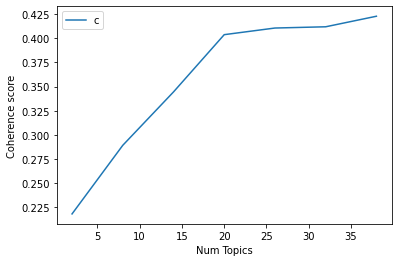

In [0]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [0]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.150*"make" + 0.088*"see" + 0.082*"day" + 0.053*"help" + 0.047*"ever" + '
  '0.036*"lol" + 0.033*"also" + 0.027*"happy" + 0.024*"hope" + 0.021*"step"'),
 (1,
  '0.094*"really" + 0.094*"take" + 0.070*"fuck" + 0.065*"let" + 0.040*"care" + '
  '0.031*"hot" + 0.028*"sad" + 0.028*"show" + 0.024*"die" + 0.021*"whole"'),
 (2,
  '0.297*"be" + 0.080*"today" + 0.034*"pain" + 0.031*"able" + 0.025*"guy" + '
  '0.023*"ready" + 0.021*"heart" + 0.015*"update" + 0.014*"moment" + '
  '0.012*"push"'),
 (3,
  '0.072*"s" + 0.043*"long" + 0.037*"bitch" + 0.037*"ass" + 0.031*"omg" + '
  '0.027*"sorry" + 0.026*"else" + 0.026*"anymore" + 0.025*"bed" + '
  '0.022*"isna"'),
 (4,
  '0.147*"think" + 0.079*"could" + 0.038*"hurt" + 0.028*"run" + 0.026*"truly" '
  '+ 0.023*"note" + 0.021*"wish" + 0.019*"water" + 0.014*"especially" + '
  '0.014*"clean"'),
 (5,
  '0.075*"year" + 0.054*"well" + 0.046*"put" + 0.045*"ask" + 0.035*"big" + '
  '0.032*"probably" + 0.030*"kid" + 0.023*"sure" + 0.021*"early" + '
  '0

In [0]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.678750552252597

Coherence Score:  0.4065629257245167


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10     0.412403  0.044542       1        1  7.038528
0      0.000983 -0.091792       2        1  6.413523
14    -0.008486 -0.003386       3        1  6.295980
8      0.009770 -0.362016       4        1  5.896898
7      0.001389 -0.095651       5        1  5.615770
13    -0.012659  0.047565       6        1  5.338973
12    -0.020829  0.012064       7        1  5.327106
18    -0.020293  0.049406       8        1  5.293106
2     -0.022619  0.044466       9        1  5.233893
16    -0.006036  0.017812      10        1  5.212483
15    -0.023706  0.017311      11        1  5.174870
19    -0.023964  0.020285      12        1  5.093297
5     -0.033016  0.028256      13        1  4.722425
1     -0.031649  0.029031      14        1  4.364211
17    -0.031550  0.042616      15        1  4.271462
3     -0.035388  0.041249      16        1  3.853828
4     -0.039948  0.041407      17        1  3.744255
9     -0.035543  0.037063      18        1  3.712059
11    -0.039910  0.039369      19        1  3.711689
6     -0.038949  0.040404      20        1  3.685641, topic_info=              Term         Freq        Total Category  logprob  loglift
103             go  2267.000000  2267.000000  Default  30.0000  30.0000
11              be  2111.000000  2111.000000  Default  29.0000  29.0000
59             get  1883.000000  1883.000000  Default  28.0000  28.0000
230           make  1305.000000  1305.000000  Default  27.0000  27.0000
113           want  1076.000000  1076.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
3727           gut    30.981619    31.828623  Topic20  -5.0860   3.2738
880          crush    30.434196    31.281187  Topic20  -5.1039   3.2733
2160          team    27.647835    28.494825  Topic20  -5.1999   3.2706
2228         judge    27.108324    27.955315  Topic20  -5.2196   3.2700
10391  chroniclife    31.882050  1112.248779  Topic20  -5.0574  -0.2514

[651 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
518       9  0.996597       able
1149     19  0.981539      abuse
2299     15  0.990422    abusive
132       5  0.987814    account
6283      8  0.982810     active
...     ...       ...        ...
1092     19  0.991213  yesterday
1445     14  0.988120        yet
3103      1  0.990840       youa
22       11  0.981597      young
3591      9  0.986962       œyou

[624 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 1, 15, 9, 8, 14, 13, 19, 3, 17, 16, 20, 6, 2, 18, 4, 5, 10, 12, 7])

In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [0]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.174682612763313

Coherence Score:  0.24894337524243323


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.244521 -0.086791       1        1  27.029060
3     -0.247699 -0.186523       2        1  25.543758
0     -0.078620  0.295079       3        1  25.152021
1      0.081798 -0.021765       4        1  22.275162, topic_info=              Term         Freq        Total Category  logprob  loglift
103             go  2323.000000  2323.000000  Default  30.0000  30.0000
59             get  1990.000000  1990.000000  Default  29.0000  29.0000
230           make  1229.000000  1229.000000  Default  28.0000  28.0000
113           want  1164.000000  1164.000000  Default  27.0000  27.0000
236           love  1205.000000  1205.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
222           show   175.488861   176.214279   Topic4  -5.1509   1.4976
209          leave   174.146759   174.869949   Topic4  -5.1586   1.4976
834          daddy   250.510773   252.333862   Topic4  -4.7950   1.4944
11              be   764.543396  2070.618896   Topic4  -3.6792   0.5054
10391  chroniclife   306.778076  1110.968140   Topic4  -4.5923   0.2148

[158 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
518       1  0.997171      able
34        3  0.997246  actually
261       4  0.998932   already
70        1  0.995740      also
10        1  0.998649    always
...     ...       ...       ...
452       1  0.996688      well
126       4  0.997690      work
329       2  0.999167     would
307       3  0.996982     wrong
25        4  0.998925      year

[132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

For Post Diagnosis Tweets

In [0]:
df_post.head()

,Username,Tweets,date
0,dp3_45pm,oh my gawd I see RUUUUSSSIIIIIAAAONN here,Mon Dec 09 20:31:08 +0000 2019
1,dp3_45pm,OOOHH MYYYY GOOOOOOOOOD,Thu Nov 28 21:14:46 +0000 2019
2,dp3_45pm,Well-,Tue Nov 26 15:06:03 +0000 2019
3,dp3_45pm,how about howling commandos series you rat?,Mon Nov 25 07:11:40 +0000 2019
4,dp3_45pm,"I hate k-pop, everyone. nothing can be fixed a...",Mon Nov 25 00:44:55 +0000 2019


In [0]:
data2 = df_post.Tweets.values.tolist()
data2 = [re.sub('\S*@\S*\s?', '', sent) for sent in data2]
data2 = [re.sub('\s+', ' ', sent) for sent in data2]
data2 = [re.sub("\'", "", sent) for sent in data2]

In [0]:
pprint(data2[:1])

['oh my gawd I see RUUUUSSSIIIIIAAAONN here']


In [0]:
data2_words = list(sent_to_words(data2))
print(data2_words[:1])

[['oh', 'my', 'gawd', 'see', 'here']]


In [0]:
# Remove Stop Words
data2_words_nostops = remove_stopwords(data2_words)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])


In [0]:
# Do lemmatization keeping only noun, adj, vb, adv
data2_lemmatized = lemmatization(data2_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [0]:
print(data2_lemmatized[:1])

[[]]


In [0]:
id2word = corpora.Dictionary(data2_lemmatized)

In [0]:
texts = data2_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [0]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[]]

In [0]:
print(corpus[:1])

[[]]


In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [0]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.068*"com" + 0.035*"talk" + 0.029*"last" + 0.027*"night" + 0.024*"let" + '
  '0.022*"eat" + 0.020*"big" + 0.018*"put" + 0.017*"hour" + 0.017*"pain"'),
 (1,
  '0.065*"love" + 0.060*"good" + 0.052*"today" + 0.049*"think" + 0.031*"year" '
  '+ 0.024*"have" + 0.023*"find" + 0.023*"call" + 0.021*"can" + 0.020*"ask"'),
 (2,
  '0.063*"take" + 0.049*"shit" + 0.046*"s" + 0.043*"try" + 0.040*"friend" + '
  '0.032*"fuck" + 0.022*"happy" + 0.020*"birthday" + 0.019*"ass" + '
  '0.016*"long"'),
 (3,
  '0.039*"still" + 0.039*"back" + 0.033*"tonight" + 0.032*"give" + '
  '0.023*"bitch" + 0.019*"home" + 0.018*"miss" + 0.016*"whole" + 0.016*"lose" '
  '+ 0.016*"guy"'),
 (4,
  '0.074*"time" + 0.057*"know" + 0.052*"people" + 0.048*"would" + 0.032*"bad" '
  '+ 0.030*"tell" + 0.030*"much" + 0.026*"watch" + 0.019*"always" + '
  '0.018*"hate"'),
 (5,
  '0.115*"get" + 0.103*"go" + 0.049*"feel" + 0.037*"really" + 0.030*"look" + '
  '0.029*"thank" + 0.025*"help" + 0.023*"could" + 0.017*"well" + 0.015*"n

In [0]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data2_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.737809147889205

Coherence Score:  0.2831042364944866


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.382032 -0.005650       1        1  12.916018
4      0.053798 -0.344780       2        1  11.768673
1      0.053212  0.164243       3        1  11.077199
6      0.043136  0.034048       4        1   9.895132
7      0.045683  0.044541       5        1   9.854381
8      0.041772  0.033853       6        1   9.734745
9      0.038300  0.025202       7        1   9.508827
0      0.039996  0.023349       8        1   8.871280
3      0.032348  0.012202       9        1   8.445265
2      0.033787  0.012992      10        1   7.928482, topic_info=         Term         Freq        Total Category  logprob  loglift
17         be  2497.000000  2497.000000  Default  30.0000  30.0000
94        get  2506.000000  2506.000000  Default  29.0000  29.0000
22         go  2240.000000  2240.000000  Default  28.0000  28.0000
10       want  1364.000000  1364.000000  Default  27.0000  27.0000
48       time  1477.000000  1477.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
2254      bro    76.455734    77.344223  Topic10  -5.1662   2.5232
1086     link    76.175484    77.063850  Topic10  -5.1699   2.5231
572   feeling    75.192162    76.080643  Topic10  -5.1829   2.5230
1555    white    73.427025    74.315399  Topic10  -5.2066   2.5227
385     sweet    69.589478    70.477982  Topic10  -5.2603   2.5220

[333 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1173      9  0.996219       able
2712     10  0.992018      abuse
561       4  0.996144   actually
1481      2  0.997494        ago
334       5  0.996429     almost
...     ...       ...        ...
241       2  0.998878      would
773       9  0.992446      wrong
51        3  0.998300       year
297       7  0.995651  yesterday
1824      7  0.989444        yet

[314 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 2, 7, 8, 9, 10, 1, 4, 3])

WordCloud after data cleaning

In [0]:
pre_diag_words = '\\n'.join([text for text in df_pre['Tweets']])
post_diag_words = '\\n'.join([text for text in df_post['Tweets']])

TypeError: ignored

In [0]:
type(data_lemmatized)

list

In [0]:
 pip install wordcloud

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(data_words_nostops)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: ignored